In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import pickle    

import math
from PIL import Image

In [2]:
with open('C:/Users/danii/Desktop/NHL Datasets/2019FullDataset.pkl', 'rb') as f:
    game_d = pickle.load(f)

In [32]:
p = {}
for data in game_d:
    if 'liveData' in data:
        plays = data['liveData']['plays']['allPlays'] 
        for play in plays:
            if 'players' in play:
                    for player in play['players']:
                        if player['playerType'] in ['Scorer', 'Shooter']:
                            for play['result']['eventTypeId'] in ['goal', 'shot']:
                                if 'secondaryType' in play['result']:
                                    p.setdefault(play['result']['secondaryType'], {})

In [33]:
p

{'Tip-In': {},
 'Snap Shot': {},
 'Wrist Shot': {},
 'Slap Shot': {},
 'Backhand': {},
 'Deflected': {},
 'Wrap-around': {}}

In [3]:
def league_shots_goals():
    
    league_data = {}
    league_data['Shot'] = {}
    league_data['Shot']['x'] = []
    league_data['Shot']['y'] = []
    league_data['Goal'] = {}
    league_data['Goal']['x'] = []
    league_data['Goal']['y'] = []
    event_types = ['Shot','Goal']
    
    for data in game_d:
        if 'liveData' in data:
            plays = data['liveData']['plays']['allPlays'] 

            for play in plays: 
                for event in event_types:  
                    if play['result']['event'] in event:
                        if 'x' in play['coordinates']:

                            league_data[event]['x'].append(play['coordinates']['x'])
                            league_data[event]['y'].append(play['coordinates']['y'])
                            
    return league_data

In [13]:
def player_shots_goals(namePlayer):

    player_data = {}
    player_data['Shot'] = {}
    player_data['Shot']['x'] = []
    player_data['Shot']['y'] = []
    player_data['Goal'] = {}
    player_data['Goal']['x'] = []
    player_data['Goal']['y'] = []
    
    league_data = {}
    league_data['Shot'] = {}
    league_data['Shot']['x'] = []
    league_data['Shot']['y'] = []
    league_data['Goal'] = {}
    league_data['Goal']['x'] = []
    league_data['Goal']['y'] = []
    event_types = ['Shot','Goal']
    
    for data in game_d:
        if 'liveData' in data:
            plays = data['liveData']['plays']['allPlays'] 

            for play in plays: 
                for event in event_types:  
                    if play['result']['event'] in event:
                        if 'x' in play['coordinates']:

                            league_data[event]['x'].append(play['coordinates']['x'])
                            league_data[event]['y'].append(play['coordinates']['y'])

    for data in game_d:
        if 'liveData' in data:
            plays = data['liveData']['plays']['allPlays'] 
            for play in plays:
                if 'players' in play:
                    for player in play['players']:
                        if player['player']['fullName'] in namePlayer and player['playerType'] in ['Shooter', 'Scorer']:
                            for event in event_types:
                                if play['result']['event'] in event:
                                    if 'x' in play['coordinates']:
                                        player_data[event]['x'].append(play['coordinates']['x'])
                                        player_data[event]['y'].append(play['coordinates']['y'])
                                        
    league_t_s = len(league_data['Shot']['x']) + len(league_data['Goal']['x'])
    league_t_g = len(league_data['Goal']['x'])
    player_t_g = len(player_data['Goal']['x'])
    player_t_s = len(player_data['Shot']['x']) + len(player_data['Goal']['x'])
    per_league_goal = league_t_s / league_t_g
    per_player_goal = player_t_s / player_t_g
    per_player_of_league = per_player_goal - per_league_goal
    
    return player_data
    
    #print(league_t_g)
    #print(league_t_s)
    print('total goals = ', player_t_g)
    print('total shots = ', player_t_s)
    #print(per_league_goal)
    print('goal persent = ', per_player_goal)
    print('goal persent of average league = ', per_player_of_league)

In [14]:
l_d = league_shots_goals()
l_d

{'Shot': {'x': [-32.0,
   63.0,
   -59.0,
   -42.0,
   -52.0,
   -38.0,
   -76.0,
   -63.0,
   -78.0,
   -32.0,
   -80.0,
   78.0,
   47.0,
   -64.0,
   83.0,
   67.0,
   47.0,
   56.0,
   -45.0,
   50.0,
   -41.0,
   -62.0,
   67.0,
   43.0,
   30.0,
   81.0,
   -31.0,
   56.0,
   43.0,
   37.0,
   35.0,
   45.0,
   12.0,
   -60.0,
   58.0,
   57.0,
   86.0,
   60.0,
   45.0,
   29.0,
   -33.0,
   -89.0,
   -56.0,
   -68.0,
   -67.0,
   -70.0,
   -43.0,
   55.0,
   -62.0,
   70.0,
   -59.0,
   5.0,
   2.0,
   66.0,
   64.0,
   -62.0,
   85.0,
   38.0,
   64.0,
   48.0,
   -20.0,
   -44.0,
   -35.0,
   84.0,
   -38.0,
   92.0,
   63.0,
   33.0,
   39.0,
   -68.0,
   -81.0,
   72.0,
   -75.0,
   -47.0,
   90.0,
   80.0,
   91.0,
   81.0,
   85.0,
   52.0,
   41.0,
   44.0,
   87.0,
   65.0,
   78.0,
   72.0,
   87.0,
   -82.0,
   -80.0,
   -60.0,
   -34.0,
   67.0,
   -78.0,
   -40.0,
   -65.0,
   -94.0,
   -39.0,
   83.0,
   -81.0,
   -87.0,
   -36.0,
   -52.0,
   81.0,
   -77.0,
   -5

In [15]:
p_d = player_shots_goals('Artemi Panarin')
p_d

{'Shot': {'x': [-52.0,
   -61.0,
   -87.0,
   60.0,
   74.0,
   -75.0,
   -74.0,
   63.0,
   -59.0,
   -67.0,
   -59.0,
   -63.0,
   -78.0,
   -58.0,
   64.0,
   -74.0,
   -82.0,
   -62.0,
   -80.0,
   -57.0,
   65.0,
   84.0,
   -51.0,
   -56.0,
   -62.0,
   -65.0,
   -72.0,
   -66.0,
   -61.0,
   -72.0,
   -45.0,
   -66.0,
   56.0,
   -62.0,
   81.0,
   -84.0,
   -80.0,
   -14.0,
   -65.0,
   40.0,
   66.0,
   43.0,
   65.0,
   -59.0,
   -39.0,
   -66.0,
   -44.0,
   69.0,
   60.0,
   -80.0,
   -67.0,
   45.0,
   71.0,
   -51.0,
   -65.0,
   59.0,
   70.0,
   -67.0,
   -49.0,
   60.0,
   -62.0,
   -63.0,
   -60.0,
   -74.0,
   -39.0,
   59.0,
   53.0,
   48.0,
   51.0,
   49.0,
   53.0,
   79.0,
   -52.0,
   -79.0,
   73.0,
   -67.0,
   -74.0,
   -37.0,
   60.0,
   -58.0,
   -79.0,
   -53.0,
   -54.0,
   -59.0,
   65.0,
   -69.0,
   -74.0,
   50.0,
   68.0,
   74.0,
   67.0,
   -37.0,
   61.0,
   53.0,
   -72.0,
   -40.0,
   -70.0,
   52.0,
   75.0,
   -24.0,
   -53.0,
   -63.0,
   -

In [16]:
league_x_shots = l_d['Shot']['x'] + l_d['Goal']['x']
league_y_shots = l_d['Shot']['y'] + l_d['Goal']['y']

league_x_shots_normalized = []
league_y_shots_normalized = []

for i,s in enumerate(league_x_shots):
    if league_x_shots[i] < 0:
        league_x_shots_normalized.append(-league_x_shots[i])
        league_y_shots_normalized.append(-league_y_shots[i])
    else:
        league_x_shots_normalized.append(league_x_shots[i])
        league_y_shots_normalized.append(league_y_shots[i])
        
league_x_goal_normalized = []
league_y_goal_normalized = []

for i,s in enumerate(l_d['Goal']['x']):
    if l_d['Goal']['x'][i] < 0:
       league_x_goal_normalized.append(-l_d['Goal']['x'][i])
       league_y_goal_normalized.append(-l_d['Goal']['y'][i])
    else:
       league_x_goal_normalized.append(l_d['Goal']['x'][i])
       league_y_goal_normalized.append(l_d['Goal']['y'][i])
        
'''\
minus league data in abs data\
'''

'minus league data in abs data'

In [17]:
player_x_shots = p_d['Shot']['x'] + p_d['Goal']['x']
player_y_shots = p_d['Shot']['y'] + p_d['Goal']['y']

player_x_normalized = []
player_y_normalized = []

for i, s in enumerate(player_x_shots):
    if player_x_shots[i] < 0:
        player_x_normalized.append(-player_x_shots[i])
        player_y_normalized.append(-player_y_shots[i])
    else :
        player_x_normalized.append(player_x_shots[i])
        player_y_normalized.append(player_y_shots[i])
        
player_x_goal_normalized = []
player_y_goal_normalized = []

for i, s in enumerate(p_d['Goal']['x']):
    if p_d['Goal']['x'][i] < 0:
        player_x_goal_normalized.append(-p_d['Goal']['x'][i])
        player_y_goal_normalized.append(-p_d['Goal']['y'][i])
    else:
        player_x_goal_normalized.append(p_d['Goal']['x'][i])
        player_y_goal_normalized.append(p_d['Goal']['y'][i])
        
'''\
minus player data in abs\
'''

'minus player data in abs'

In [136]:
I = Image.open('C:/Users/danii/Desktop/NHL Datasets/im.jpg')

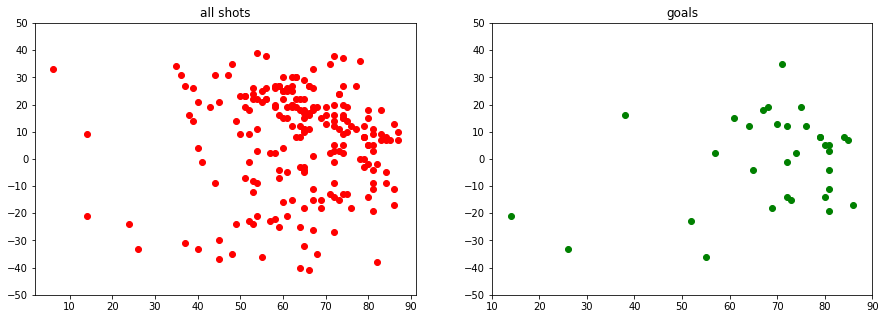

In [139]:
fig = plt.figure(figsize = (15,11))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
# ax1.imshow(I)

ax1.scatter(player_x_normalized, player_y_normalized, color = 'r')
ax2.scatter(player_x_goal_normalized, player_y_goal_normalized, color = 'g')

ax1.set_title('all shots')
ax2.set_title('goals')
ax1.set_yticks([-50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50])
ax2.set_yticks([-50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50])
ax1.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
ax2.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90])